In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#import matplotlib.font_manager as fm
import matplotlib
import autotime
%matplotlib inline
%load_ext autotime
#import seaborn as sns
import statsmodels as stm
import statsmodels.formula.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV as GSCV
from dask_searchcv import GridSearchCV as DGSCV

#from sklearn.tree import export_graphviz
#from IPython.display import Image

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# setting variables
cores = 3
SSIDno = 13551357

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x0000000008151F98>> (for post_run_cell):


AssertionError: 

##  Reading in the data and preparing the SSID dataframe

In [3]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_016C_travel_time.csv')
route_list_SSID13551357 = ['068A', '0016', '065B', '0122', '0083', '0009', '083A', '0065', '0068']
for r in route_list_SSID13551357:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,1278,7,680001,0.033333,44951278,False,4495,2012-11-06,17,1916,14.5
1,Tuesday,1282,7,680001,0.033333,12781282,False,1278,2012-11-06,61,1916,14.5
2,Tuesday,4456,7,680001,0.033333,12824456,False,1282,2012-11-06,59,1916,14.5
3,Tuesday,1284,7,680001,0.033333,44561284,False,4456,2012-11-06,41,1916,14.5
4,Tuesday,1285,8,680001,0.000000,12841285,False,1284,2012-11-06,80,1916,15.0
5,Tuesday,1286,8,680001,0.000000,12851286,False,1285,2012-11-06,179,1916,15.0
6,Tuesday,1288,8,680001,0.000000,12861288,False,1286,2012-11-06,20,1916,15.0
7,Tuesday,1289,8,680001,0.000000,12881289,False,1288,2012-11-06,41,1916,15.0
8,Tuesday,1360,8,680001,0.000000,12891360,False,1289,2012-11-06,89,1916,15.0
9,Tuesday,1362,8,680001,0.000000,13601362,False,1360,2012-11-06,20,1916,15.0


time: 4.95 s


In [4]:
res.shape

(1943443, 12)

time: 24 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	812
HourFrame	20
JourneyPatternID	48
Rain	129
SSID	5017
SchoolHoliday	2
SourceStopID	809
TimeFrame	57
TravelTime	1792
VehicleJourneyID	4963
WindSpeed	58
time: 394 ms


In [6]:
# create dataframe for SSID

res['SSID'] = res['SSID'].astype('category')
ssid_df = res[res.SSID == SSIDno] 
ssid_df.shape

(16093, 12)

time: 227 ms


In [7]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in ssid_df:
    print(column + "\t" + str(len(ssid_df[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	20
JourneyPatternID	20
Rain	126
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	57
TravelTime	347
VehicleJourneyID	2691
WindSpeed	58
time: 11 ms


In [8]:
ssid_df.reset_index(inplace=True)
ssid_df = ssid_df.drop('index', axis=1)
ssid_df.memory_usage(deep=True)

Index                    80
Day                 1033744
DestStopID           128744
HourFrame            128744
JourneyPatternID     635666
Rain                 128744
SSID                 236162
SchoolHoliday         16093
SourceStopID         128744
TimeFrame           1078231
TravelTime           128744
VehicleJourneyID     128744
WindSpeed            128744
dtype: int64

time: 13 ms


In [9]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 12 columns):
Day                 16093 non-null object
DestStopID          16093 non-null int64
HourFrame           16093 non-null int64
JourneyPatternID    16093 non-null object
Rain                16093 non-null float64
SSID                16093 non-null category
SchoolHoliday       16093 non-null bool
SourceStopID        16093 non-null int64
TimeFrame           16093 non-null object
TravelTime          16093 non-null int64
VehicleJourneyID    16093 non-null int64
WindSpeed           16093 non-null float64
dtypes: bool(1), category(1), float64(2), int64(5), object(3)
memory usage: 3.7 MB
time: 14 ms


In [10]:
ssid_df['JourneyPatternID'] = ssid_df['JourneyPatternID'].astype('object')

time: 3 ms


In [11]:
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,1357,7,681001,0.033333,13551357,False,1355,2012-11-06,60,1915,14.5
1,Wednesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-07,41,1915,14.0
2,Thursday,1357,7,681001,0.000000,13551357,False,1355,2012-11-08,41,1915,12.5
3,Friday,1357,7,681001,1.166667,13551357,False,1355,2012-11-09,39,1915,16.0
4,Saturday,1357,7,681001,0.033333,13551357,True,1355,2012-11-10,61,9102,10.0
5,Monday,1357,7,681001,0.666667,13551357,False,1355,2012-11-12,81,1915,9.5
6,Tuesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-13,61,1915,18.0
7,Wednesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-14,41,1915,13.0
8,Thursday,1357,7,681001,0.000000,13551357,False,1355,2012-11-15,39,1915,3.5
9,Friday,1357,7,681001,0.000000,13551357,False,1355,2012-11-16,18,1915,2.5


time: 38 ms


In [12]:
# adding Xbuses feature - boolean feature indicating whether or not the JourneyPatternID represents an express (X) bus

ssid_df['XBuses'] = ssid_df[ssid_df["JourneyPatternID"].str.find("X") > 0].sum(axis=1) > 0
ssid_df["XBuses"].fillna(False, inplace=True)
ssid_df['XBuses'] = ssid_df['XBuses'].astype('int')

ssid_df.head(10)

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses
0,Tuesday,1357,7,681001,0.033333,13551357,False,1355,2012-11-06,60,1915,14.5,0
1,Wednesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-07,41,1915,14.0,0
2,Thursday,1357,7,681001,0.000000,13551357,False,1355,2012-11-08,41,1915,12.5,0
3,Friday,1357,7,681001,1.166667,13551357,False,1355,2012-11-09,39,1915,16.0,0
4,Saturday,1357,7,681001,0.033333,13551357,True,1355,2012-11-10,61,9102,10.0,0
5,Monday,1357,7,681001,0.666667,13551357,False,1355,2012-11-12,81,1915,9.5,0
6,Tuesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-13,61,1915,18.0,0
7,Wednesday,1357,7,681001,0.000000,13551357,False,1355,2012-11-14,41,1915,13.0,0
8,Thursday,1357,7,681001,0.000000,13551357,False,1355,2012-11-15,39,1915,3.5,0
9,Friday,1357,7,681001,0.000000,13551357,False,1355,2012-11-16,18,1915,2.5,0


time: 38 ms


In [13]:
# adding JPID_length feature - represents the total number of stops traversed by this JourneyPatternID along its entire route

JPIDL = pd.read_csv('JPID_Length.csv')
JPIDL

,Unnamed: 0,JourneyPatternID,JPID_length
0,58,00010001,42
1,97,00010002,21
2,110,00011001,42
3,152,00011002,23
4,167,00040001,60
5,296,00070001,67
6,335,00070002,66
7,410,00080001,46
8,421,00081001,51
9,429,00090001,66


time: 15 ms


In [14]:
JPIDL = JPIDL.drop('Unnamed: 0', axis=1)
# ssid_df['JourneyPatternID'] = ssid_df['JourneyPatternID'].astype('category')
ssid_df.JourneyPatternID = ssid_df.JourneyPatternID.apply(lambda x: str(x).zfill(8))
ssid_df = pd.merge(left=ssid_df ,right=JPIDL, how='left', left_on='JourneyPatternID', right_on='JourneyPatternID')
ssid_df = ssid_df.dropna()
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses,JPID_length
0,Tuesday,1357,7,00681001,0.033333,13551357,False,1355,2012-11-06,60,1915,14.5,0,71
1,Wednesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-07,41,1915,14.0,0,71
2,Thursday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-08,41,1915,12.5,0,71
3,Friday,1357,7,00681001,1.166667,13551357,False,1355,2012-11-09,39,1915,16.0,0,71
4,Saturday,1357,7,00681001,0.033333,13551357,True,1355,2012-11-10,61,9102,10.0,0,71
5,Monday,1357,7,00681001,0.666667,13551357,False,1355,2012-11-12,81,1915,9.5,0,71
6,Tuesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-13,61,1915,18.0,0,71
7,Wednesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-14,41,1915,13.0,0,71
8,Thursday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-15,39,1915,3.5,0,71
9,Friday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-16,18,1915,2.5,0,71


time: 97 ms


In [15]:
ssid_df.shape

(16093, 14)

time: 2 ms


In [16]:
# adding JPID_Freq feature - represents how often in the given data this JourneyPatternID traversed this segment

ssid_df['JPID_Freq'] = ssid_df.groupby(['JourneyPatternID'])['JourneyPatternID'].transform('count')
ssid_df

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed,XBuses,JPID_length,JPID_Freq
0,Tuesday,1357,7,00681001,0.033333,13551357,False,1355,2012-11-06,60,1915,14.5,0,71,47
1,Wednesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-07,41,1915,14.0,0,71,47
2,Thursday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-08,41,1915,12.5,0,71,47
3,Friday,1357,7,00681001,1.166667,13551357,False,1355,2012-11-09,39,1915,16.0,0,71,47
4,Saturday,1357,7,00681001,0.033333,13551357,True,1355,2012-11-10,61,9102,10.0,0,71,47
5,Monday,1357,7,00681001,0.666667,13551357,False,1355,2012-11-12,81,1915,9.5,0,71,47
6,Tuesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-13,61,1915,18.0,0,71,47
7,Wednesday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-14,41,1915,13.0,0,71,47
8,Thursday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-15,39,1915,3.5,0,71,47
9,Friday,1357,7,00681001,0.000000,13551357,False,1355,2012-11-16,18,1915,2.5,0,71,47


time: 55 ms


In [17]:
# removing non-holiday-period weekends from SchoolHoliday feature to avoid multi-collinearity issues

ssid_df['SchoolHoliday'] = ssid_df['SchoolHoliday'].astype('int')
ssid_df['SchoolHoliday'] = np.where(ssid_df['TimeFrame'].isin(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06']), 1, 0)

time: 4 ms


In [18]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16093 entries, 0 to 16092
Data columns (total 15 columns):
Day                 16093 non-null object
DestStopID          16093 non-null int64
HourFrame           16093 non-null int64
JourneyPatternID    16093 non-null object
Rain                16093 non-null float64
SSID                16093 non-null category
SchoolHoliday       16093 non-null int32
SourceStopID        16093 non-null int64
TimeFrame           16093 non-null object
TravelTime          16093 non-null int64
VehicleJourneyID    16093 non-null int64
WindSpeed           16093 non-null float64
XBuses              16093 non-null int32
JPID_length         16093 non-null int64
JPID_Freq           16093 non-null int64
dtypes: category(1), float64(2), int32(2), int64(7), object(3)
memory usage: 4.6 MB
time: 37 ms


In [19]:
# fetching SSID number from dataframe for CSV file naming purposes

res.SSID = res.SSID.apply(lambda x: str(int(x)).zfill(8))
r = ssid_df.loc[0, 'SSID'] 

time: 19 ms


In [20]:
# dropping unneeded columns

ssid_df = ssid_df.drop(['SourceStopID', 'DestStopID', 'VehicleJourneyID', 'JourneyPatternID', 'SSID'], axis=1)

time: 13 ms


In [21]:
# reorder remaining columns

ssid_df = ssid_df[['TravelTime', 'Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'XBuses', 'SchoolHoliday', 'Day', 'HourFrame']]

time: 23 ms


In [22]:
ssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,60,0.033333,14.5,71,47,0,0,Tuesday,7
1,41,0.000000,14.0,71,47,0,0,Wednesday,7
2,41,0.000000,12.5,71,47,0,0,Thursday,7
3,39,1.166667,16.0,71,47,0,0,Friday,7
4,61,0.033333,10.0,71,47,0,0,Saturday,7
5,81,0.666667,9.5,71,47,0,0,Monday,7
6,61,0.000000,18.0,71,47,0,0,Tuesday,7
7,41,0.000000,13.0,71,47,0,0,Wednesday,7
8,39,0.000000,3.5,71,47,0,0,Thursday,7
9,18,0.000000,2.5,71,47,0,0,Friday,7


time: 30 ms


In [23]:
cores = 3

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x0000000008151F98>> (for post_run_cell):


AssertionError: 

In [24]:
ssid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16093 entries, 0 to 16092
Data columns (total 9 columns):
TravelTime       16093 non-null int64
Rain             16093 non-null float64
WindSpeed        16093 non-null float64
JPID_length      16093 non-null int64
JPID_Freq        16093 non-null int64
XBuses           16093 non-null int32
SchoolHoliday    16093 non-null int32
Day              16093 non-null object
HourFrame        16093 non-null int64
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 2.6 MB
time: 7 ms


In [25]:
# assigning appropriate datatypes where necessary

ssid_df['Day'] = ssid_df['Day'].astype('category')
ssid_df['HourFrame'] = ssid_df['HourFrame'].astype('category')
ssid_df['JPID_length'] = ssid_df['JPID_length'].astype('int')

time: 50 ms


In [26]:
# save as csv


ssid_df.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 127 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

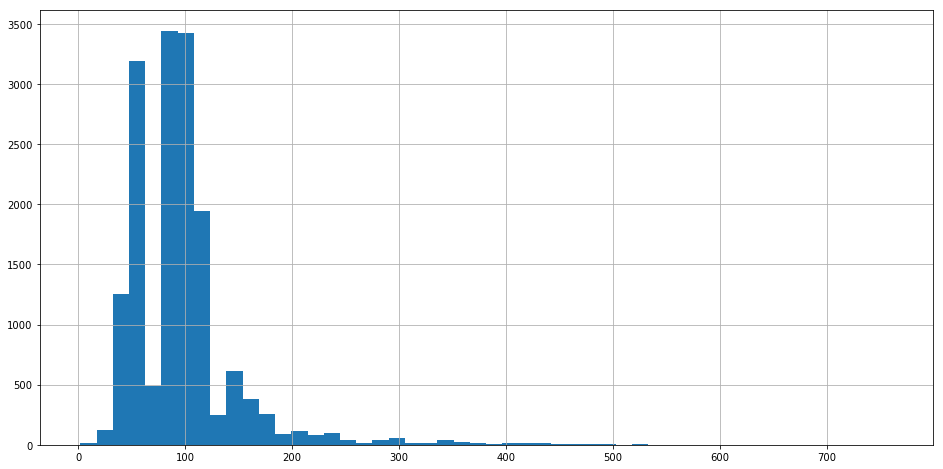

time: 225 ms


In [27]:
ssid_df.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

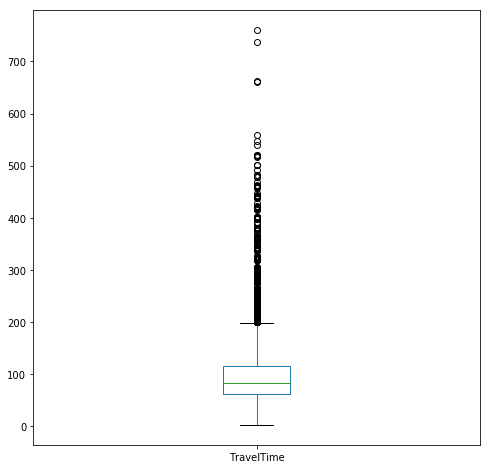

time: 211 ms


In [28]:
ssid_df.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [29]:
# Checking stats for TravelTime

ssid_df.TravelTime.describe()

count    16093.000000
mean        96.409930
std         51.760333
min          2.000000
25%         61.000000
50%         82.000000
75%        116.000000
max        761.000000
Name: TravelTime, dtype: float64

time: 7 ms


## Dropping outliers

In [30]:
# loading table of times to traverse segments at 80kmph

find_lb = pd.read_csv('use_speed_and_distance_get_outlier_bound.csv')

# extracting value for this segment, to use as lower bound for outlier removal

lb = find_lb.loc[find_lb['SSID'] == 9090786, 'min_sec'].iloc[0]
print(lb)

14.5378563877
time: 9 ms


In [31]:
# make a copy of original df

trimssid_df = ssid_df.copy()

# Remove TravelTime upper bound outliers beyond a conservative 2 x IQR, and lowerbound below 'lb'

ub = trimssid_df.quantile(q=.75) + (2*(trimssid_df.quantile(q=.75)-trimssid_df.quantile(q=.25)))
trimssid_df['OutlierTT'] = (trimssid_df['TravelTime'] < lb) | (trimssid_df['TravelTime'] > ub['TravelTime'])

# Outlier rows counted

print("There will be", trimssid_df[(trimssid_df['OutlierTT'] == True)].shape[0], "outliers dropped.")

There will be 446 outliers dropped.
time: 16 ms


In [32]:
# dropping outliers

trimssid_df = trimssid_df[trimssid_df.OutlierTT != True]
trimssid_df.sort_values(['TravelTime'], ascending=False, inplace=True)
trimssid_df = trimssid_df.drop(['OutlierTT'], axis=1)
trimssid_df.reset_index(inplace=True)
trimssid_df = trimssid_df.drop('index', axis=1)
trimssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,225,0.000000,9.5,68,3270,0,0,Friday,21
1,224,0.000000,17.0,68,3270,0,0,Thursday,20
2,224,0.000000,10.5,68,3270,0,0,Friday,17
3,224,0.000000,4.0,68,537,0,0,Friday,16
4,223,0.000000,11.0,72,3775,0,0,Thursday,21
5,223,0.000000,11.0,70,2218,0,0,Thursday,21
6,223,0.666504,18.0,53,3010,0,0,Saturday,17
7,223,0.000000,4.5,30,54,0,1,Friday,23
8,222,0.000000,4.0,68,3270,0,0,Friday,15
9,222,0.000000,7.5,68,3270,0,0,Thursday,18


time: 69 ms


In [33]:
# Create TT mean/median value variables, to use in calculating mean/median absolute percentage error scores
# and for horizontal lines in the charts below to represent the mean/medium

ssid_df = trimssid_df
ssid_df_mean = ssid_df.TravelTime.mean()
ssid_df_median  = ssid_df.TravelTime.median()
ssid_df.TravelTime.describe()

count    15647.000000
mean        90.362881
std         34.832693
min         15.000000
25%         61.000000
50%         82.000000
75%        103.000000
max        225.000000
Name: TravelTime, dtype: float64

time: 8 ms


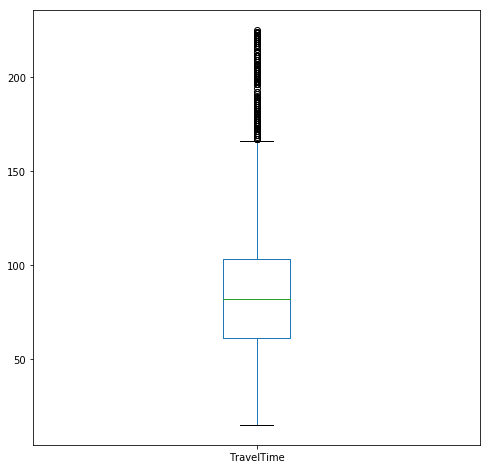

time: 198 ms


In [34]:
ssid_df.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

## Visualising the data

### 1a Bar plot for mean TravelTime per HourFrame

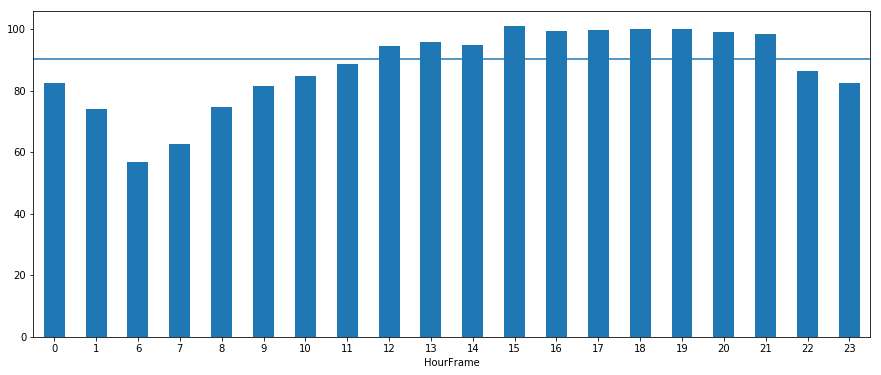

time: 194 ms


In [35]:
mean_HF = ssid_df.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 1b Bar plot for median TravelTime per HourFrame

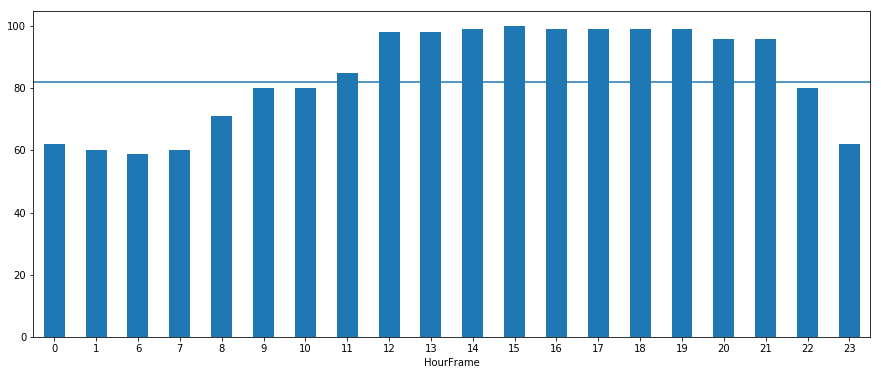

time: 190 ms


In [36]:
med_HF = ssid_df.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

### 2a Bar plot for mean TravelTime per Day

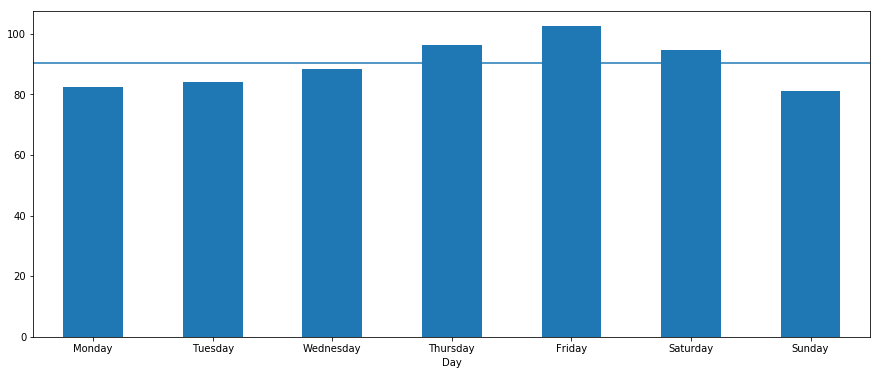

time: 144 ms


In [37]:
mean_Day = ssid_df.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 2b Bar plot for median TravelTime per HourFrame

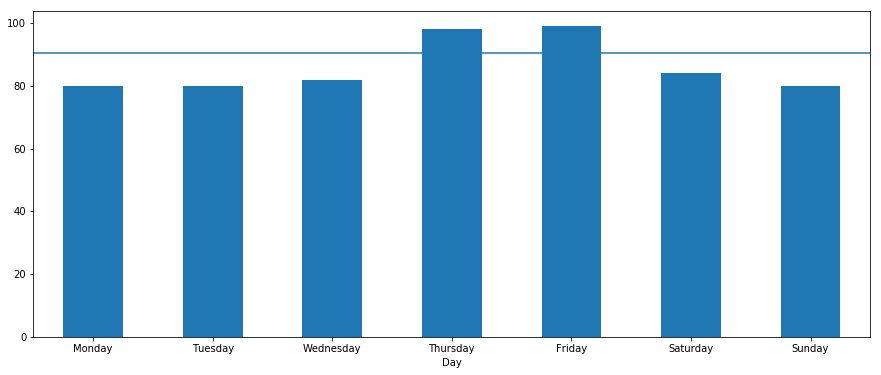

time: 146 ms


In [38]:
med_Day = ssid_df.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

### 3a Bar plot for mean TravelTime when SchoolHoliday true/false

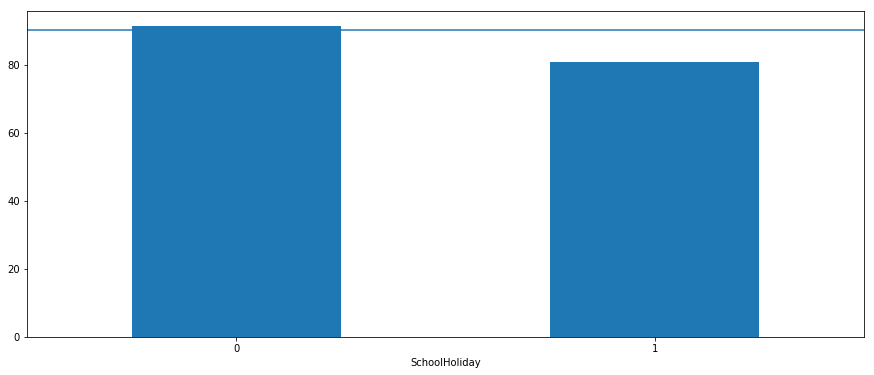

time: 124 ms


In [39]:
mean_SH = ssid_df.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### 3b Bar plot for median TravelTime when SchoolHoliday true/false

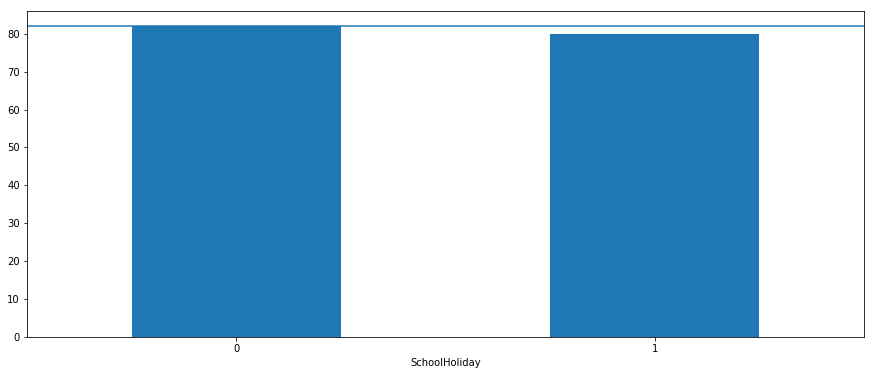

time: 129 ms


In [40]:
med_SH = ssid_df.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = ssid_df_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

## Model training (statsmodels)

### 1a. Linear Regression model (via statsmodels - to see p-values)

Splitting data into 70% for training and 30% for testing

In [41]:
# Code to split data taken from here: http://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

ssid_train=ssid_df.sample(frac=0.7, random_state=38)
ssid_test=ssid_df.drop(ssid_train.index)
print ("Training set size is",len(ssid_train))
print ("Training set size is",len(ssid_test))

Training set size is 10953
Training set size is 4694
time: 8 ms


In [42]:
lrle = sm.ols(formula="TravelTime ~ SchoolHoliday + WindSpeed + Rain + JPID_length + JPID_Freq + XBuses + C(HourFrame) + C(Day)", data=ssid_train).fit()

time: 5.34 s


In [43]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     84.16
Date:                Fri, 25 Aug 2017   Prob (F-statistic):               0.00
Time:                        04:41:58   Log-Likelihood:                -53329.
No. Observations:               10953   AIC:                         1.067e+05
Df Residuals:                   10922   BIC:                         1.069e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              94.4755    

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [44]:
# repeat on test frame and return Adj. R-squared value

#rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle.predict(ssid_lin_test))
#print ("The predicted adjusted R-squared value on the test frame is", rsqa)

time: 1e+03 µs


### 1b. Repeat Linear Regression model via statsmodels with continuous features normalised

We need to normalise the relevant parts of the original data and then repeat the test/train split

In [45]:
# Normalising continuous features

ssid_lin = ssid_df
ssid_lin['WindSpeed'] = (ssid_lin['WindSpeed']-ssid_lin['WindSpeed'].min())/(ssid_lin['WindSpeed'].max()-ssid_lin['WindSpeed'].min())
ssid_lin['Rain'] = (ssid_lin['Rain']-ssid_lin['Rain'].min())/(ssid_lin['Rain'].max()-ssid_lin['Rain'].min())
ssid_lin['JPID_length'] = (ssid_lin['JPID_length']-ssid_lin['JPID_length'].min())/(ssid_lin['JPID_length'].max()-ssid_lin['JPID_length'].min())
ssid_lin['JPID_Freq'] = (ssid_lin['JPID_Freq']-ssid_lin['JPID_Freq'].min())/(ssid_lin['JPID_Freq'].max()-ssid_lin['JPID_Freq'].min())
ssid_lin

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,Day,HourFrame
0,225,0.000000,0.288136,0.696970,0.864611,0,0,Friday,21
1,224,0.000000,0.542373,0.696970,0.864611,0,0,Thursday,20
2,224,0.000000,0.322034,0.696970,0.864611,0,0,Friday,17
3,224,0.000000,0.101695,0.696970,0.131903,0,0,Friday,16
4,223,0.000000,0.338983,0.757576,1.000000,0,0,Thursday,21
5,223,0.000000,0.338983,0.727273,0.582574,0,0,Thursday,21
6,223,0.145950,0.576271,0.469697,0.794906,0,0,Saturday,17
7,223,0.000000,0.118644,0.121212,0.002413,0,1,Friday,23
8,222,0.000000,0.101695,0.696970,0.864611,0,0,Friday,15
9,222,0.000000,0.220339,0.696970,0.864611,0,0,Thursday,18


time: 70 ms


In [46]:
ssid_lin_train=ssid_lin.sample(frac=0.7, random_state=38)
ssid_lin_test=ssid_lin.drop(ssid_lin_train.index)
print ("Training set size is",len(ssid_lin_train))
print ("Training set size is",len(ssid_lin_test))

Training set size is 10953
Training set size is 4694
time: 7 ms


In [47]:
lrle1 = sm.ols(formula="TravelTime ~ SchoolHoliday + WindSpeed + Rain + JPID_length + JPID_Freq + XBuses + C(HourFrame) + C(Day)", data=ssid_lin_train).fit()

time: 7.44 s


In [48]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     84.16
Date:                Fri, 25 Aug 2017   Prob (F-statistic):               0.00
Time:                        04:42:06   Log-Likelihood:                -53329.
No. Observations:               10953   AIC:                         1.067e+05
Df Residuals:                   10922   BIC:                         1.069e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              95.6297    

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [49]:
# repeat on test frame and return Adj. R-squared value

# rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle.predict(ssid_lin_test))
# print ("The predicted adjusted R-squared value on the test frame is", rsqa)

time: 1e+03 µs


## Model training (Scikit-learn)

First we need to dreate dummy variables for categorical features, and split into test and training sets

### Prepare data for modelling via Scikit-learn

In [50]:
# create dummy variables from HourFrame and Day using get_dummies
# dropping first values to avoid multicollinearity (Day = Friday, Hour = 0 or 6 or 7, depending on SSID)

Day_dummies = pd.get_dummies(ssid_df.Day, prefix='Day', drop_first=True)
HF_dummies = pd.get_dummies(ssid_df.HourFrame, prefix='HF', drop_first=True)

# concatenate the dummy variable columns onto the original DataFrame and drop the original features
ssid_df = pd.concat([ssid_df, HF_dummies, Day_dummies], axis=1)
ssid_df = ssid_df.drop(['HourFrame', 'Day'], axis=1)
ssid_df

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,HF_1,HF_6,HF_7,...,HF_20,HF_21,HF_22,HF_23,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,225,0.000000,0.288136,0.696970,0.864611,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,224,0.000000,0.542373,0.696970,0.864611,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,224,0.000000,0.322034,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224,0.000000,0.101695,0.696970,0.131903,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,223,0.000000,0.338983,0.757576,1.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,223,0.000000,0.338983,0.727273,0.582574,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,223,0.145950,0.576271,0.469697,0.794906,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,223,0.000000,0.118644,0.121212,0.002413,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,222,0.000000,0.101695,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,222,0.000000,0.220339,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


time: 147 ms


In [51]:
# remove any constant features

selector = VarianceThreshold()
selector.fit_transform(ssid_df)

array([[  2.25000000e+02,   0.00000000e+00,   2.88135593e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.24000000e+02,   0.00000000e+00,   5.42372881e-01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.24000000e+02,   0.00000000e+00,   3.22033898e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.70000000e+01,   0.00000000e+00,   4.23728814e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.60000000e+01,   0.00000000e+00,   3.89830508e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.50000000e+01,   0.00000000e+00,   1.35593220e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

time: 17 ms


In [52]:
# prepare a list containing all remaining features bar the target
pred_features = list(ssid_df)
pred_features.remove('TravelTime')
print(pred_features)

['Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'XBuses', 'SchoolHoliday', 'HF_1', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
time: 2 ms


In [53]:
# prepare target/predictive feature variables for use in scikit-learn modelling

X = ssid_df[pred_features]
y = ssid_df['TravelTime']

time: 4 ms


In [54]:
# split the data into training portion (70%) and final testing potion (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 38)

time: 6 ms


### 1a Linear Regression model (via scikit-learn) - training - default parameters

In [55]:
lr = LinR(n_jobs = cores)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=3, normalize=False)

time: 2.92 s


In [56]:
lr_pred = lr.predict(X_train)
lr_rsq = metrics.r2_score(y_train, lr_pred)
print ("The R-squared value of the Linear Regression model is", lr_rsq)

The R-squared value of the Linear Regression model is 0.186428847649
time: 78 ms


In [57]:
lr_mae = metrics.mean_absolute_error(y_train, lr_pred)
print ("The mean absolute error of the Linear Regression model is", lr_mae)
print ("The mean absolute percentage error is", (((lr_mae)/ssid_df_mean)*100))

The mean absolute error of the Linear Regression model is 24.258919288
The mean absolute percentage error is 26.846110928
time: 348 ms


In [58]:
lr_mdae = metrics.median_absolute_error(y_train, lr_pred)
print ("The median absolute error of the Linear Regression model is", lr_mdae)
print ("The median absolute percentage error is", (((lr_mdae)/ssid_df_median)*100))

The median absolute error of the Linear Regression model is 20.1465967419
The median absolute percentage error is 24.5690204169
time: 4 ms


### 1b Linear Regression model (via scikit-learn) - testing - default parameters

In [59]:
lr_preda = lr.predict(X_test)
lr_rsq = metrics.r2_score(y_test, lr_preda)
print ("The R-squared value of the Linear Regression model is", lr_rsq)

The R-squared value of the Linear Regression model is 0.1795652041
time: 19 ms


In [60]:
lr_mae = metrics.mean_absolute_error(y_test, lr_preda)
print ("The mean absolute error of the Linear Regression model is", lr_mae)
print ("The mean absolute percentage error is", (((lr_mae)/ssid_df_mean)*100))

The mean absolute error of the Linear Regression model is 24.4795162932
The mean absolute percentage error is 27.0902344028
time: 2 ms


In [61]:
lr_mdae = metrics.median_absolute_error(y_test, lr_preda)
print ("The median absolute error of the Linear Regression model is", lr_mdae)
print ("The median absolute percentage error is", (((lr_mdae)/ssid_df_median)*100))

The median absolute error of the Linear Regression model is 20.1928766065
The median absolute percentage error is 24.6254592762
time: 237 ms


### 2.1a Support Vector Machine Regression with Linear Kernel model - training - default parameters

In [62]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 6.16 s


In [63]:
svr_lin_pred = svr_lin.predict(X_train)
svr_lin_rsq = metrics.r2_score(y_train, svr_lin_pred)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.16502432291
time: 3.69 s


In [64]:
svr_lin_mae = metrics.mean_absolute_error(y_train, svr_lin_pred)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svr_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 24.0504169121
The mean absolute percentage error is 26.6153719637
time: 2 ms


In [65]:
svr_lin_mdae = metrics.median_absolute_error(y_train, svr_lin_pred)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svr_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 19.4599593286
The median absolute percentage error is 23.7316577179
time: 4 ms


### 2.1b Support Vector Machine Regression with Linear Kernel model - testing - default parameters

In [66]:
svr_lin_preda = svr_lin.predict(X_test)
svr_lin_rsq = metrics.r2_score(y_test, svr_lin_preda)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.164482636059
time: 1.55 s


In [67]:
svr_lin_mae = metrics.mean_absolute_error(y_test, svr_lin_preda)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svr_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 24.1251656957
The mean absolute percentage error is 26.6980926369
time: 3 ms


In [68]:
svr_lin_mdae = metrics.median_absolute_error(y_test, svr_lin_preda)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svr_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 19.6952174981
The median absolute percentage error is 24.0185579245
time: 3 ms


### 2.1c Repeat SVR with Linear Kernel model, continuous data normalised - training  - default parameters

First we have to normalise the relevant data

In [69]:
# Normalising continuous features

ssid_norm = ssid_df
ssid_norm['WindSpeed'] = (ssid_norm['WindSpeed']-ssid_norm['WindSpeed'].min())/(ssid_norm['WindSpeed'].max()-ssid_norm['WindSpeed'].min())
ssid_norm['Rain'] = (ssid_norm['Rain']-ssid_norm['Rain'].min())/(ssid_norm['Rain'].max()-ssid_norm['Rain'].min())
ssid_norm['JPID_length'] = (ssid_norm['JPID_length']-ssid_norm['JPID_length'].min())/(ssid_norm['JPID_length'].max()-ssid_norm['JPID_length'].min())
ssid_norm['JPID_Freq'] = (ssid_norm['JPID_Freq']-ssid_norm['JPID_Freq'].min())/(ssid_norm['JPID_Freq'].max()-ssid_norm['JPID_Freq'].min())
ssid_norm

,TravelTime,Rain,WindSpeed,JPID_length,JPID_Freq,XBuses,SchoolHoliday,HF_1,HF_6,HF_7,...,HF_20,HF_21,HF_22,HF_23,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,225,0.000000,0.288136,0.696970,0.864611,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,224,0.000000,0.542373,0.696970,0.864611,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,224,0.000000,0.322034,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224,0.000000,0.101695,0.696970,0.131903,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,223,0.000000,0.338983,0.757576,1.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,223,0.000000,0.338983,0.727273,0.582574,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,223,0.145950,0.576271,0.469697,0.794906,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,223,0.000000,0.118644,0.121212,0.002413,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,222,0.000000,0.101695,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,222,0.000000,0.220339,0.696970,0.864611,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


time: 60 ms


In [70]:
# prepare a list containing all remaining features bar the target

pred_features = list(ssid_norm)
pred_features.remove('TravelTime')
print(pred_features)

['Rain', 'WindSpeed', 'JPID_length', 'JPID_Freq', 'XBuses', 'SchoolHoliday', 'HF_1', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
time: 2 ms


In [71]:
# prepare farget/predictive feature variables for use in scikit-learn modelling

X_norm = ssid_norm[pred_features]
y_norm = ssid_norm['TravelTime']

time: 6 ms


In [72]:
# split the data into training portion (70%) and final testing potion (30%)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, y_norm, test_size = 0.3, random_state = 38)

time: 4 ms


Now onto modelling

In [73]:
svrn_lin = SVR(kernel='linear')
svrn_lin.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 6.06 s


In [74]:
svrn_lin_pred = svrn_lin.predict(X_train)
svrn_lin_rsq = metrics.r2_score(yn_train, svrn_lin_pred)
print ("The R-squared value of the SVR with Linear Kernel model is", svrn_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.16502432291
time: 3.66 s


In [75]:
svrn_lin_mae = metrics.mean_absolute_error(y_train, svr_lin_pred)
print ("The mean absolute error of the SVR with Linear Kernel model is", svrn_lin_mae)
print ("The mean absolute percentage error is", (((svrn_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 24.0504169121
The mean absolute percentage error is 26.6153719637
time: 2 ms


In [76]:
svrn_lin_mdae = metrics.median_absolute_error(y_train, svr_lin_pred)
print ("The median absolute error of the SVR with Linear Kernel model is", svrn_lin_mdae)
print ("The median absolute percentage error is", (((svrn_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 19.4599593286
The median absolute percentage error is 23.7316577179
time: 8 ms


### 2.1d Repeat SVR with Linear Kernel model, continuous data normalised - testing  - default parameters

In [77]:
svrn_lin_preda = svrn_lin.predict(Xn_test)
svrn_lin_rsq = metrics.r2_score(yn_test, svrn_lin_preda)
print ("The R-squared value of the SVR with Linear Kernel model is", svr_lin_rsq)

The R-squared value of the SVR with Linear Kernel model is 0.164482636059
time: 1.54 s


In [78]:
svrn_lin_mae = metrics.mean_absolute_error(yn_test, svrn_lin_preda)
print ("The mean absolute error of the SVR with Linear Kernel model is", svr_lin_mae)
print ("The mean absolute percentage error is", (((svrn_lin_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Linear Kernel model is 24.1251656957
The mean absolute percentage error is 26.6980926369
time: 3 ms


In [79]:
svrn_lin_mdae = metrics.median_absolute_error(yn_test, svrn_lin_preda)
print ("The median absolute error of the SVR with Linear Kernel model is", svr_lin_mdae)
print ("The median absolute percentage error is", (((svrn_lin_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Linear Kernel model is 19.6952174981
The median absolute percentage error is 24.0185579245
time: 5 ms


### 2.2a Support Vector Machine Regression with Polynomial Kernel model - training - default parameters

In [80]:
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 5.84 s


In [81]:
svr_poly_pred = svr_poly.predict(X_train)
svr_poly_rsq = metrics.r2_score(y_train, svr_poly_pred)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svr_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0576450653275
time: 3.85 s


In [82]:
svr_poly_mae = metrics.mean_absolute_error(y_train, svr_poly_pred)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svr_poly_mae)
print ("The mean absolute percentage error is", (((svr_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 26.6587721608
The mean absolute percentage error is 29.5019059232
time: 3 ms


In [83]:
svr_poly_mdae = metrics.median_absolute_error(y_train, svr_poly_pred)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svr_poly_mdae)
print ("The median absolute percentage error is", (((svr_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 20.957200779
The median absolute percentage error is 25.5575619256
time: 2 ms


### 2.2b Support Vector Machine Regression with Polynomial Kernel model - testing - default parameters

In [84]:
svr_poly_preda = svr_poly.predict(X_test)
svr_poly_rsq = metrics.r2_score(y_test, svr_poly_preda)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svr_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0531174863905
time: 1.58 s


In [85]:
svr_poly_mae = metrics.mean_absolute_error(y_test, svr_poly_preda)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svr_poly_mae)
print ("The mean absolute percentage error is", (((svr_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 26.6716925211
The mean absolute percentage error is 29.5162042281
time: 2 ms


In [86]:
svr_poly_mdae = metrics.median_absolute_error(y_test, svr_poly_preda)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svr_poly_mdae)
print ("The median absolute percentage error is", (((svr_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 20.9723708066
The median absolute percentage error is 25.5760619593
time: 2 ms


### 2.2c Repeat SVR with Polynomial Kernel model, continuous data normalised - training - default parameters

In [87]:
svrn_poly = SVR(kernel='poly')
svrn_poly.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 5.79 s


In [88]:
svrn_poly_pred = svrn_poly.predict(Xn_train)
svrn_poly_rsq = metrics.r2_score(yn_train, svrn_poly_pred)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svrn_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0576450653275
time: 3.53 s


In [89]:
svrn_poly_mae = metrics.mean_absolute_error(yn_train, svrn_poly_pred)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mae)
print ("The mean absolute percentage error is", (((svrn_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 26.6587721608
The mean absolute percentage error is 29.5019059232
time: 2 ms


In [90]:
svrn_poly_mdae = metrics.median_absolute_error(yn_train, svrn_poly_pred)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mdae)
print ("The median absolute percentage error is", (((svrn_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 20.957200779
The median absolute percentage error is 25.5575619256
time: 3 ms


### 2.2d Repeat SVR with Polynomial Kernel model, continuous data normalised - testing  - default parameters

In [91]:
svrn_poly_preda = svrn_poly.predict(Xn_test)
svrn_poly_rsq = metrics.r2_score(yn_test, svrn_poly_preda)
print ("The R-squared value of the SVR with Polynomial Kernel model is", svrn_poly_rsq)

The R-squared value of the SVR with Polynomial Kernel model is -0.0531174863905
time: 1.52 s


In [92]:
svrn_poly_mae = metrics.mean_absolute_error(yn_test, svrn_poly_preda)
print ("The mean absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mae)
print ("The mean absolute percentage error is", (((svrn_poly_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with Polynomial Kernel model is 26.6716925211
The mean absolute percentage error is 29.5162042281
time: 4 ms


In [93]:
svrn_poly_mdae = metrics.median_absolute_error(yn_test, svrn_poly_preda)
print ("The median absolute error of the SVR with Polynomial Kernel model is", svrn_poly_mdae)
print ("The median absolute percentage error is", (((svrn_poly_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with Polynomial Kernel model is 20.9723708066
The median absolute percentage error is 25.5760619593
time: 5 ms


### 2.3a Support Vector Machine Regression with RBF Kernel model - training - default parameters

In [94]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 7.14 s


In [95]:
svr_rbf_pred = svr_rbf.predict(X_train)
svr_rbf_rsq = metrics.r2_score(y_train, svr_rbf_pred)
print ("The R-squared value of the SVR with RBF Kernel model is", svr_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.119414434464
time: 4.9 s


In [96]:
svr_rbf_mae = metrics.mean_absolute_error(y_train, svr_rbf_pred)
print ("The mean absolute error of the SVR with RBF Kernel model is", svr_rbf_mae)
print ("The mean absolute percentage error is", (((svr_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 24.7849326723
The mean absolute percentage error is 27.4282231605
time: 3 ms


In [97]:
svr_rbf_mdae = metrics.median_absolute_error(y_train, svr_rbf_pred)
print ("The median absolute error of the SVR with RBF Kernel model is", svr_rbf_mdae)
print ("The median absolute percentage error is", (((svr_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 20.1401088703
The median absolute percentage error is 24.5611083784
time: 4 ms


### 2.3b Support Vector Machine Regression with RBF Kernel model - testing - default parameters

In [98]:
svr_rbf_preda = svr_rbf.predict(X_test)
svr_rbf_rsq = metrics.r2_score(y_test, svr_rbf_preda)
print ("The R-squared value of the SVR with RBF Kernel model is", svr_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.118228811086
time: 2.09 s


In [99]:
svr_rbf_mae = metrics.mean_absolute_error(y_test, svr_rbf_preda)
print ("The mean absolute error of the SVR with RBF Kernel model is", svr_rbf_mae)
print ("The mean absolute percentage error is", (((svr_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 24.8515433713
The mean absolute percentage error is 27.5019378299
time: 3 ms


In [100]:
svr_rbf_mdae = metrics.median_absolute_error(y_test, svr_rbf_preda)
print ("The median absolute error of the SVR with RBF Kernel model is", svr_rbf_mdae)
print ("The median absolute percentage error is", (((svr_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 20.57598157
The median absolute percentage error is 25.0926604512
time: 2 ms


### 2.3c Repeat SVR with RBF Kernel model, continuous data normalised - training  - default parameters

In [101]:
svrn_rbf = SVR(kernel='rbf')
svrn_rbf.fit(Xn_train, yn_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

time: 7.16 s


In [102]:
svrn_rbf_pred = svrn_rbf.predict(Xn_train)
svrn_rbf_rsq = metrics.r2_score(yn_train, svrn_rbf_pred)
print ("The R-squared value of the SVR with RBF Kernel model is", svrn_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.119414434464
time: 4.89 s


In [103]:
svrn_rbf_mae = metrics.mean_absolute_error(yn_train, svrn_rbf_pred)
print ("The mean absolute error of the SVR with RBF Kernel model is", svrn_rbf_mae)
print ("The mean absolute percentage error is", (((svrn_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 24.7849326723
The mean absolute percentage error is 27.4282231605
time: 3 ms


In [104]:
svrn_rbf_mdae = metrics.median_absolute_error(yn_train, svrn_rbf_pred)
print ("The median absolute error of the SVR with RBF Kernel model is", svrn_rbf_mdae)
print ("The median absolute percentage error is", (((svrn_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 20.1401088703
The median absolute percentage error is 24.5611083784
time: 4 ms


### 2.3d Repeat SVR with RBF Kernel model, continuous data normalised - testing  - default parameters

In [105]:
svrn_rbf_preda = svrn_rbf.predict(Xn_test)
svrn_rbf_rsq = metrics.r2_score(yn_test, svrn_rbf_preda)
print ("The R-squared value of the SVR with RBF Kernel model is", svrn_rbf_rsq)

The R-squared value of the SVR with RBF Kernel model is 0.118228811086
time: 2.09 s


In [106]:
svrn_rbf_mae = metrics.mean_absolute_error(yn_test, svrn_rbf_preda)
print ("The mean absolute error of the SVR with RBF Kernel model is", svrn_rbf_mae)
print ("The mean absolute percentage error is", (((svrn_rbf_mae)/ssid_df_mean)*100))

The mean absolute error of the SVR with RBF Kernel model is 24.8515433713
The mean absolute percentage error is 27.5019378299
time: 3 ms


In [107]:
svrn_rbf_mdae = metrics.median_absolute_error(yn_test, svrn_rbf_preda)
print ("The median absolute error of the SVR with RBF Kernel model is", svrn_rbf_mdae)
print ("The median absolute percentage error is", (((svrn_rbf_mdae)/ssid_df_median)*100))

The median absolute error of the SVR with RBF Kernel model is 20.57598157
The median absolute percentage error is 25.0926604512
time: 3 ms


### 3a Decision Tree Regression model - training - default parameters

In [108]:
# code from here: https://gist.github.com/JustGlowing/fa2c0ac39415eb271db6

dtr = DTR()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

time: 46 ms


#### Printing ranking of features by estimated predictive value for Decision Tree Regression

In [109]:
# code adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
indices = np.argsort(dtr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
WindSpeed 	 0.215917076733
JPID_Freq 	 0.127894139526
Rain 	 0.0826497459732
JPID_length 	 0.0700714878633
HF_7 	 0.0626172829379
SchoolHoliday 	 0.0294276953887
Day_Thursday 	 0.0283295723122
Day_Sunday 	 0.027562031378
HF_8 	 0.0267503607121
Day_Tuesday 	 0.0245352492441
Day_Wednesday 	 0.0235695893192
Day_Monday 	 0.0233188903074
Day_Saturday 	 0.0215358747534
HF_23 	 0.0209876583674
HF_9 	 0.0196725547004
HF_17 	 0.0173996096764
HF_20 	 0.017126773264
HF_10 	 0.0166056511267
HF_21 	 0.0165631038564
HF_22 	 0.0156485729639
HF_19 	 0.0152662933327
HF_6 	 0.0143361535784
HF_18 	 0.0126503352411
HF_16 	 0.011971894971
HF_14 	 0.0118775877883
HF_15 	 0.011111452414
HF_11 	 0.0109955263549
HF_12 	 0.00991790039528
HF_13 	 0.00922610901007
HF_1 	 0.00446382651088
XBuses 	 0.0
time: 10 ms


In [110]:
dtr_pred = dtr.predict(X_train)
dtr_rsq = metrics.r2_score(y_train, dtr_pred)
print ("The R-squared value of the Decision Tree Regression model is", dtr_rsq)

The R-squared value of the Decision Tree Regression model is 0.666684580305
time: 7 ms


In [111]:
dtr_mae = metrics.mean_absolute_error(y_train, dtr_pred)
print ("The mean absolute error of the Decision Tree Regression model is", dtr_mae)
print ("The mean absolute percentage error is", (((dtr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression model is 13.3679424357
The mean absolute percentage error is 14.793621317
time: 3 ms


In [112]:
dtr_mdae = metrics.median_absolute_error(y_train, dtr_pred)
print ("The median absolute error of the Decision Tree Regression model is", dtr_mdae)
print ("The median absolute percentage error is", (((dtr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression model is 9.5
The median absolute percentage error is 11.5853658537
time: 3 ms


### 3b Decision Tree Regression model - testing - default parameters

In [113]:
dtr_preda = dtr.predict(X_test)
dtr_rsq = metrics.r2_score(y_test, dtr_preda)
print ("The R-squared value of the Decision Tree Regression model is", dtr_rsq)

The R-squared value of the Decision Tree Regression model is -0.146359517682
time: 5 ms


In [114]:
dtr_mae = metrics.mean_absolute_error(y_test, dtr_preda)
print ("The mean absolute error of the Decision Tree Regression model is", dtr_mae)
print ("The mean absolute percentage error is", (((dtr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression model is 28.4754979354
The mean absolute percentage error is 31.5123838464
time: 3 ms


In [115]:
dtr_mdae = metrics.median_absolute_error(y_test, dtr_preda)
print ("The median absolute error of the Decision Tree Regression model is", dtr_mdae)
print ("The median absolute percentage error is", (((dtr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression model is 21.0
The median absolute percentage error is 25.6097560976
time: 4 ms


### 4a Decision Tree Regression with AdaBoost model - training - default parameters

In [116]:
abr = ABR()
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

time: 229 ms


In [117]:
indices = np.argsort(abr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
HF_7 	 0.0626172829379
Day_Monday 	 0.0233188903074
Day_Tuesday 	 0.0245352492441
HF_8 	 0.0267503607121
Day_Sunday 	 0.027562031378
JPID_Freq 	 0.127894139526
SchoolHoliday 	 0.0294276953887
Rain 	 0.0826497459732
HF_9 	 0.0196725547004
Day_Wednesday 	 0.0235695893192
WindSpeed 	 0.215917076733
HF_19 	 0.0152662933327
HF_6 	 0.0143361535784
HF_20 	 0.017126773264
HF_18 	 0.0126503352411
HF_21 	 0.0165631038564
HF_16 	 0.011971894971
HF_10 	 0.0166056511267
Day_Saturday 	 0.0215358747534
Day_Thursday 	 0.0283295723122
HF_23 	 0.0209876583674
HF_22 	 0.0156485729639
HF_13 	 0.00922610901007
HF_12 	 0.00991790039528
HF_11 	 0.0109955263549
HF_15 	 0.011111452414
HF_1 	 0.00446382651088
XBuses 	 0.0
JPID_length 	 0.0700714878633
HF_17 	 0.0173996096764
HF_14 	 0.0118775877883
time: 10 ms


In [118]:
abr_pred = abr.predict(X_train)
abr_rsq = metrics.r2_score(y_train, abr_pred)
print ("The R-squared value of the Decision Tree Regression with AdaBoost model is", abr_rsq)

The R-squared value of the Decision Tree Regression with AdaBoost model is 0.0129508636718
time: 16 ms


In [119]:
abr_mae = metrics.mean_absolute_error(y_train, abr_pred)
print ("The mean absolute error of the Decision Tree Regression with AdaBoost model is", abr_mae)
print ("The mean absolute percentage error is", (((abr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression with AdaBoost model is 27.7954482679
The mean absolute percentage error is 30.7598075015
time: 3 ms


In [120]:
abr_mdae = metrics.median_absolute_error(y_train, abr_pred)
print ("The median absolute error of the Decision Tree Regression with AdaBoost model is", abr_mdae)
print ("The median absolute percentage error is", (((abr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression with AdaBoost model is 23.8922992601
The median absolute percentage error is 29.1369503172
time: 3 ms


### 4b Decision Tree Regression with AdaBoost model - testing - default parameters

In [121]:
abr_preda = abr.predict(X_test)
abr_rsq = metrics.r2_score(y_test, abr_preda)
print ("The R-squared value of the Decision Tree Regression with AdaBoost model is", abr_rsq)

The R-squared value of the Decision Tree Regression with AdaBoost model is -0.00181367434215
time: 8 ms


In [122]:
abr_mae = metrics.mean_absolute_error(y_test, abr_preda)
print ("The mean absolute error of the Decision Tree Regression with AdaBoost model is", abr_mae)
print ("The mean absolute percentage error is", (((abr_mae)/ssid_df_mean)*100))

The mean absolute error of the Decision Tree Regression with AdaBoost model is 28.2649128406
The mean absolute percentage error is 31.2793400431
time: 2 ms


In [123]:
abr_mdae = metrics.median_absolute_error(y_test, abr_preda)
print ("The median absolute error of the Decision Tree Regression with AdaBoost model is", abr_mdae)
print ("The median absolute percentage error is", (((abr_mdae)/ssid_df_median)*100))

The median absolute error of the Decision Tree Regression with AdaBoost model is 24.8922992601
The median absolute percentage error is 30.3564625123
time: 3 ms


### 5a Gradient Boosting Regression model - training - default parameters

In [124]:
gbr = GBR()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

time: 650 ms


In [125]:
indices = np.argsort(gbr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", gbr.feature_importances_[indices[f]])

Ordered feature ranking:
Day_Monday 	 0.0875118461596
HF_7 	 0.079978664808
Rain 	 0.0753388242268
WindSpeed 	 0.0746215647246
Day_Tuesday 	 0.072257664152
JPID_Freq 	 0.0588831569674
Day_Sunday 	 0.0555706550202
HF_8 	 0.0552596601188
HF_9 	 0.0489212049729
HF_6 	 0.0461496744159
SchoolHoliday 	 0.04244705686
HF_23 	 0.0405880023198
Day_Saturday 	 0.0389962314669
Day_Wednesday 	 0.0357080599599
HF_10 	 0.0318805669971
HF_22 	 0.0276477775741
HF_11 	 0.0194045571281
HF_21 	 0.0169849541835
HF_19 	 0.0152958960728
HF_15 	 0.0125138847788
HF_16 	 0.0111601925394
Day_Thursday 	 0.011032168414
HF_18 	 0.0106077246402
HF_20 	 0.0102312194112
JPID_length 	 0.00978967034611
HF_17 	 0.00709962083548
HF_12 	 0.00411950090642
HF_1 	 0.0
XBuses 	 0.0
HF_13 	 0.0
HF_14 	 0.0
time: 71 ms


In [126]:
gbr_pred = gbr.predict(X_train)
gbr_rsq = metrics.r2_score(y_train, gbr_pred)
print ("The R-squared value of the Gradient Boosting Regression model is", gbr_rsq)

The R-squared value of the Gradient Boosting Regression model is 0.237322237132
time: 19 ms


In [127]:
gbr_mae = metrics.mean_absolute_error(y_train, gbr_pred)
print ("The mean absolute error of the Gradient Boosting Regression model is", gbr_mae)
print ("The mean absolute percentage error is", (((gbr_mae)/ssid_df_mean)*100))

The mean absolute error of the Gradient Boosting Regression model is 23.424548448
The mean absolute percentage error is 25.922755198
time: 3 ms


In [128]:
gbr_mdae = metrics.median_absolute_error(y_train, gbr_pred)
print ("The median absolute error of the Gradient Boosting Regression model is", gbr_mdae)
print ("The median absolute percentage error is", (((gbr_mdae)/ssid_df_median)*100))

The median absolute error of the Gradient Boosting Regression model is 19.4670561924
The median absolute percentage error is 23.7403124298
time: 3 ms


### 5b Gradient Boosting Regression model - - testing - default parameters

In [129]:
gbr_preda = gbr.predict(X_test)
gbr_rsq = metrics.r2_score(y_test, gbr_preda)
print ("The R-squared value of the Gradient Boosting Regression model is", gbr_rsq)

The R-squared value of the Gradient Boosting Regression model is 0.208577469763
time: 11 ms


In [130]:
gbr_mae = metrics.mean_absolute_error(y_test, gbr_preda)
print ("The mean absolute error of the Gradient Boosting Regression model is", gbr_mae)
print ("The mean absolute percentage error is", (((gbr_mae)/ssid_df_mean)*100))

The mean absolute error of the Gradient Boosting Regression model is 23.951516046
The mean absolute percentage error is 26.5059234103
time: 4 ms


In [131]:
gbr_mdae = metrics.median_absolute_error(y_test, gbr_preda)
print ("The median absolute error of the Gradient Boosting Regression model is", gbr_mdae)
print ("The median absolute percentage error is", (((gbr_mdae)/ssid_df_median)*100))

The median absolute error of the Gradient Boosting Regression model is 20.2022791977
The median absolute percentage error is 24.6369258508
time: 2 ms


### 6a Random Forest Regression model (all default) - training - default parameters

In [132]:
rfr = RFR(n_jobs = cores)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

time: 226 ms


In [133]:
indices = np.argsort(rfr.feature_importances_)[::-1]

# Print the ordered feature ranking
print("Ordered feature ranking:")

for f in range(X_train.shape[1]):
    feat = indices[f]
    print(X_train.columns[feat], "\t", dtr.feature_importances_[indices[f]])

Ordered feature ranking:
WindSpeed 	 0.215917076733
JPID_Freq 	 0.127894139526
JPID_length 	 0.0700714878633
Rain 	 0.0826497459732
HF_7 	 0.0626172829379
SchoolHoliday 	 0.0294276953887
HF_8 	 0.0267503607121
Day_Thursday 	 0.0283295723122
Day_Saturday 	 0.0215358747534
Day_Sunday 	 0.027562031378
Day_Wednesday 	 0.0235695893192
Day_Tuesday 	 0.0245352492441
HF_23 	 0.0209876583674
Day_Monday 	 0.0233188903074
HF_20 	 0.017126773264
HF_22 	 0.0156485729639
HF_9 	 0.0196725547004
HF_19 	 0.0152662933327
HF_16 	 0.011971894971
HF_18 	 0.0126503352411
HF_10 	 0.0166056511267
HF_21 	 0.0165631038564
HF_15 	 0.011111452414
HF_17 	 0.0173996096764
HF_6 	 0.0143361535784
HF_11 	 0.0109955263549
HF_14 	 0.0118775877883
HF_12 	 0.00991790039528
HF_13 	 0.00922610901007
HF_1 	 0.00446382651088
XBuses 	 0.0
time: 110 ms


In [134]:
rfr_pred = rfr.predict(X_train)
rfr_rsq = metrics.r2_score(y_train, rfr_pred)
print ("The R-squared value of the Random Forest Regression model is", rfr_rsq)

The R-squared value of the Random Forest Regression model is 0.610020756063
time: 107 ms


In [135]:
rfr_mae = metrics.mean_absolute_error(y_train, rfr_pred)
print ("The mean absolute error of the Random Forest Regression model is", rfr_mae)
print ("The mean absolute percentage error is", (((rfr_mae)/ssid_df_mean)*100))

The mean absolute error of the Random Forest Regression model is 16.175878948
The mean absolute percentage error is 17.9010217001
time: 4 ms


In [136]:
rfr_mdae = metrics.median_absolute_error(y_train, rfr_pred)
print ("The median absolute error of the Random Forest Regression model is", rfr_mdae)
print ("The median absolute percentage error is", (((rfr_mdae)/ssid_df_median)*100))

The median absolute error of the Random Forest Regression model is 12.3625
The median absolute percentage error is 15.0762195122
time: 3 ms


### 6b Random Forest Regression model (all default) - testing - default parameters

In [137]:
rfr_preda = rfr.predict(X_test)
rfr_rsq = metrics.r2_score(y_test, rfr_preda)
print ("The R-squared value of the Random Forest Regression model is", rfr_rsq)

The R-squared value of the Random Forest Regression model is 0.0557689078968
time: 105 ms


In [138]:
rfr_mae = metrics.mean_absolute_error(y_test, rfr_preda)
print ("The mean absolute error of the Random Forest Regression model is", rfr_mae)
print ("The mean absolute percentage error is", (((rfr_mae)/ssid_df_mean)*100))

The mean absolute error of the Random Forest Regression model is 26.1681899608
The mean absolute percentage error is 28.9590035786
time: 2 ms


In [139]:
rfr_mdae = metrics.median_absolute_error(y_test, rfr_preda)
print ("The median absolute error of the Random Forest Regression model is", rfr_mdae)
print ("The median absolute percentage error is", (((rfr_mdae)/ssid_df_median)*100))

The median absolute error of the Random Forest Regression model is 20.9
The median absolute percentage error is 25.487804878
time: 6 ms
